In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [52]:
import operator

In [25]:
np.random.seed(0)
x = 5-2*np.random.normal(1,4,200)
y=x**3+0.5*x**2-5*x+ np.random.normal(2,2,200)


In [28]:
x = x[ : , np.newaxis]
y = y[ : , np.newaxis]

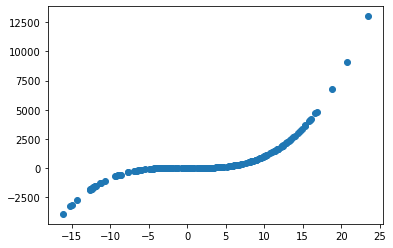

In [29]:
plt.scatter(x,y)
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

In [71]:
def make_regression(x_train, x_train_poly,  y_train, x_test, x_test_poly,  y_test):
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    print("mean_squared_error_TRAIN", mean_squared_error( y_train, model.predict(x_train_poly) ))
    print("mean_squared_error_TEST", mean_squared_error( y_test, model.predict(x_test_poly) ))  
    
    print("R2 TRAIN:", r2_score(y_train,model.predict(x_train_poly)))
    print("R2 TEST:", r2_score(y_test,model.predict(x_test_poly)))
    
    plt.figure(figsize=(12,9))
    plt.scatter(x_train,  y_train, s = 10, color = 'r')     
    plt.scatter(x_test,  y_test, s = 10, color = 'b')  
    sorted_ = sorted(zip(x_test, model.predict(x_test_poly) )) 
    x_, y_poly_pred = zip(*sorted_)
    plt.plot(x_, y_poly_pred,   color = 'yellow')   
    plt.show()
    return model
          

mean_squared_error_TRAIN 3.6032522807914056
mean_squared_error_TEST 3.5543601736857284
R2 TRAIN: 0.9999987125165468
R2 TEST: 0.9999988302027094


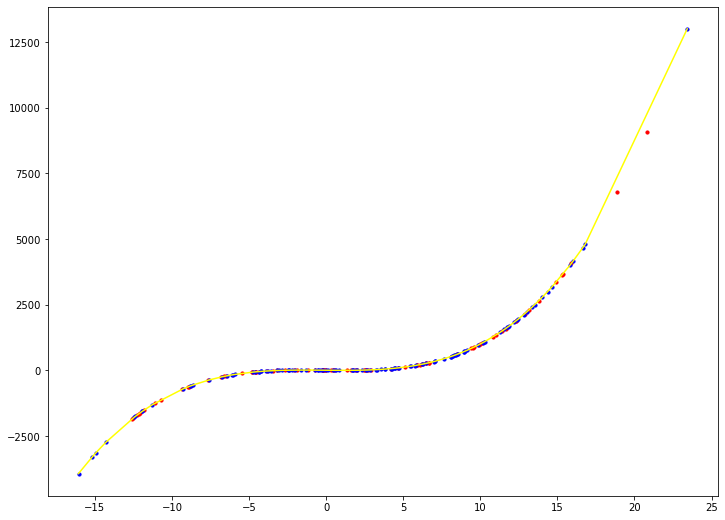

In [79]:
polynomial_features = PolynomialFeatures(degree = 3)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.transform(x_test)
m = make_regression(x_train, x_train_poly,  y_train, x_test, x_test_poly,  y_test)

In [70]:
m.coef_

array([[ 0.        , -5.03173784,  0.49832851,  1.0001717 ]])

In [ ]:
y=x**3+0.5*x**2-5*x+ np.random.normal(2,2,200)